# 7. Evaluation Project  - (Customer Churn Analysis Project)

# <span style="color:red">By :- Punit Vishal Singh</span>

# <span style="color:blue">-----------------------------------------------------------------------------------------------------------------</span>

__Description:__


#### <span style="color:red">__Customer churn is the percentage of customers who stopped purchasing your business's products or services during a certain period of time. Your customer churn rate indicates how many of your existing customers are not likely to make another purchase from your business.__</span>


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### <span style="color:green">Import Packages</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### <span style="color:green">Loading The Dataset...............</span>

In [2]:
df=pd.read_csv("Telecom_customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### <span style="color:green">Checking Column Names</span>

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7043 rows and 21 columns


In [8]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 18


### <span style="color:green">Checking Null/Missing Values</span>

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### <span style="color:blue">Droping Customer ID</span>


In [10]:
df.drop(['customerID'] ,axis=1, inplace = True)

### <span style="color:green">Describing The Data</span>

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### <span style="color:green">-> To find correlation of entire dataset with the help of heatmap </span>


<AxesSubplot:>

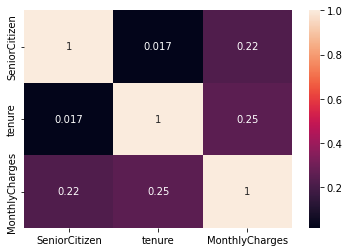

In [12]:
sns.heatmap(df.corr(),annot=True)

## <span style="color:red">Level Encoding</span> 

In [13]:
data_col=df.columns

In [14]:
from sklearn import preprocessing

In [15]:
# lets encode our columns to 0s and 1s
le = preprocessing.LabelEncoder()
for i in data_col:
    df[i]=le.fit_transform(df[i])

In [16]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1828,1,0,0,0,42,1,2,2,1,1,1,1,1,1,1,0,2,93,6439,0
5031,1,0,1,1,9,1,0,1,0,2,0,2,2,2,0,1,2,1310,6337,0
6188,1,0,0,0,18,1,0,2,1,1,1,1,1,1,0,0,3,30,3100,0
6118,1,0,0,0,72,1,2,1,2,2,2,2,2,2,2,1,2,1580,6226,0
5525,0,0,1,1,54,1,2,2,1,1,1,1,1,1,1,1,0,87,624,0


# <span style="color:red">Data Visualisation </span>

### <span style="color:green">-> To Show The Distribution Of All Variables</span>

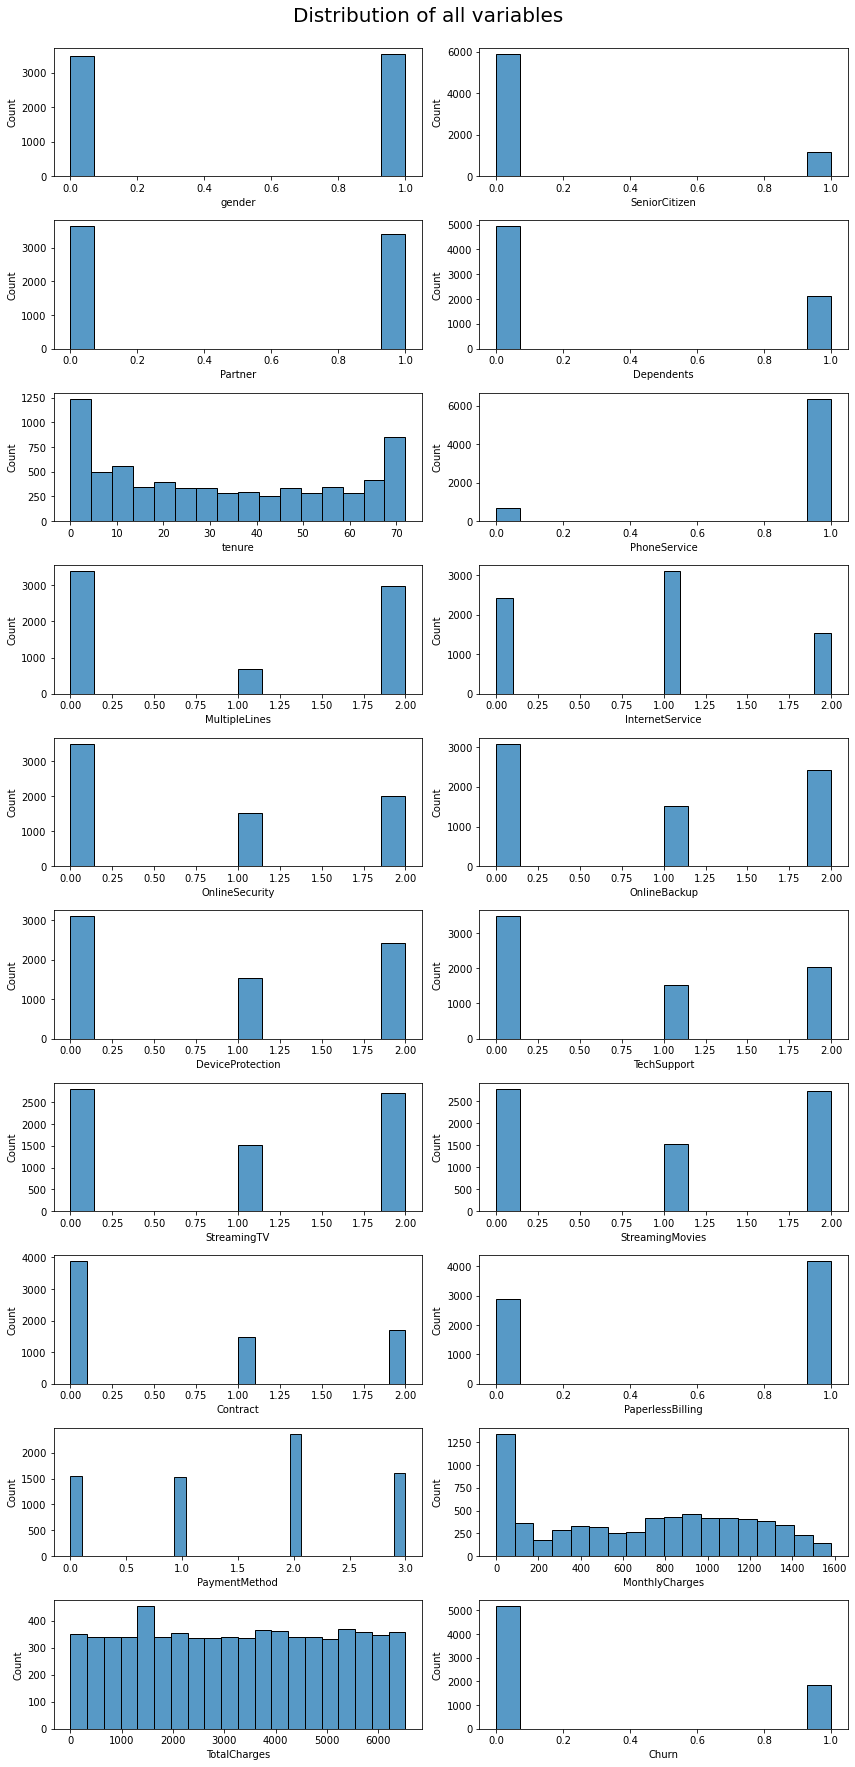

In [17]:
ncols = 2
nrows = np.ceil(len(df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(df.columns, axs.flatten()):
    sns.histplot(df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

### <span style="color:green">-> To check skewness of entire dataset all together </span>

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <Axes

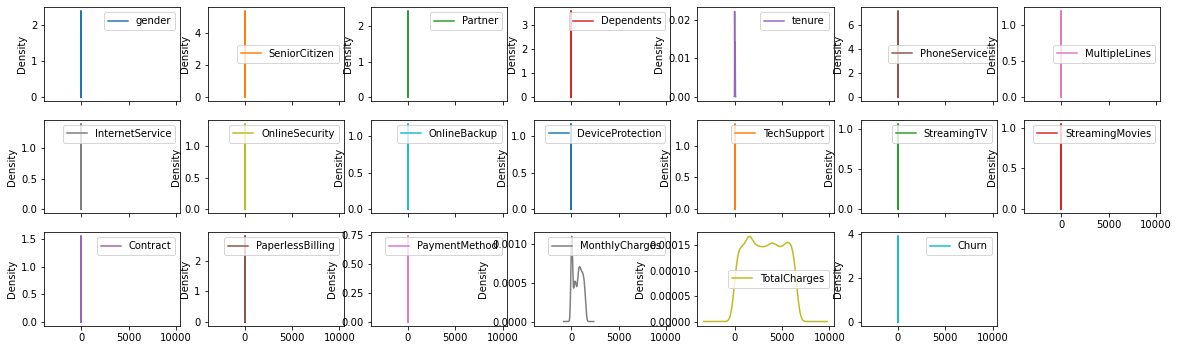

In [18]:
df.plot(kind='kde',subplots=True,layout=(5,7), figsize=(20,10))

### <span style="color:green">-> To find correlation of entire dataset with the help of heatmap </span>


<AxesSubplot:>

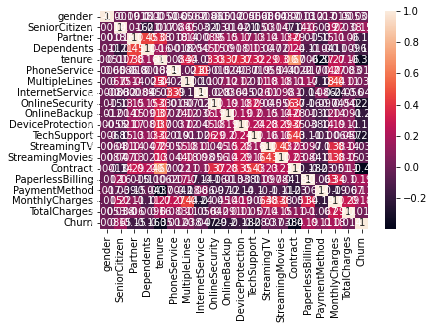

In [19]:
sns.heatmap(df.corr(),annot=True)

### <span style="color:green">-> Using Subplot To Show Column-Wise Relationship With Churn</span>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

([<matplotlib.patches.Wedge at 0x20b841076d0>,
 [Text(-0.8737983419259258, 0.9625364708142249, '0'),
  Text(0.7393677515287918, -0.8144540060674139, '1')])

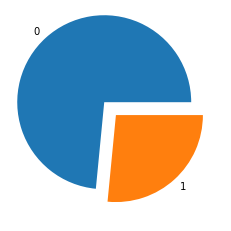

In [21]:
Churn_count= pd.DataFrame(df['Churn'].value_counts())
plt.pie(Churn_count['Churn'], labels =['0' , '1'], explode = (0.2,0))

### <span style="color:blue">-> Using Subplot To Show gender-wise Churn</span>

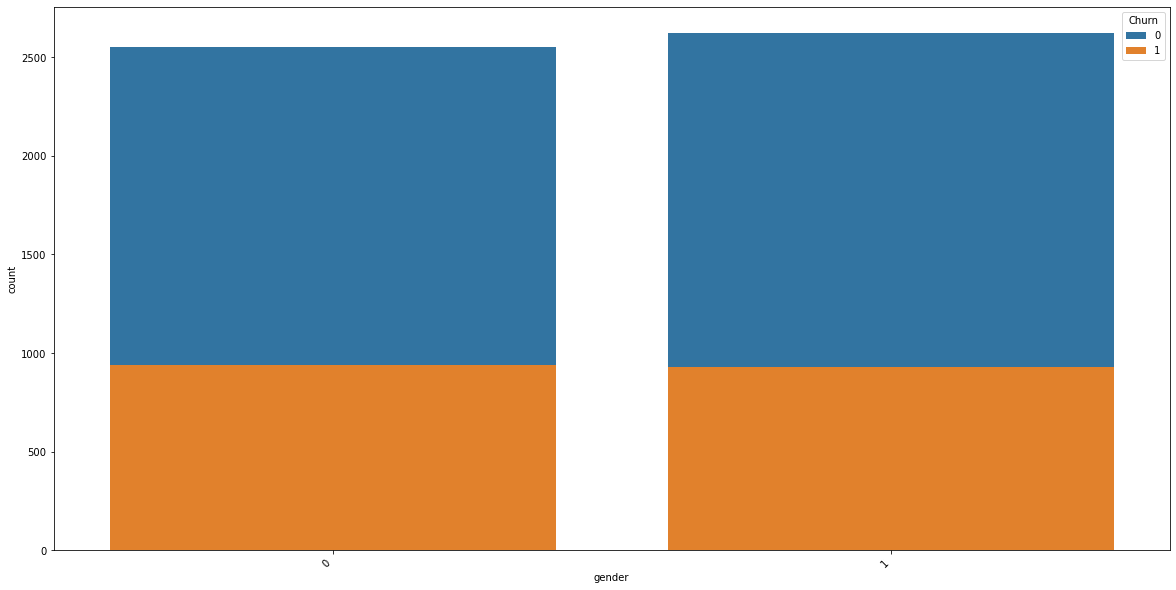

In [22]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'gender', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

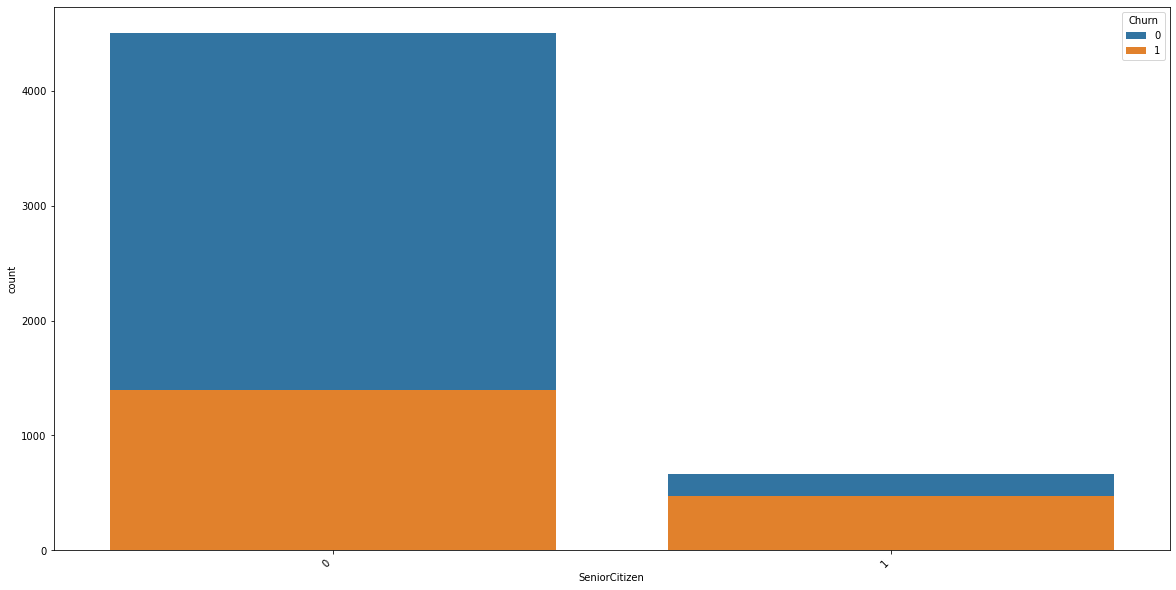

In [23]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

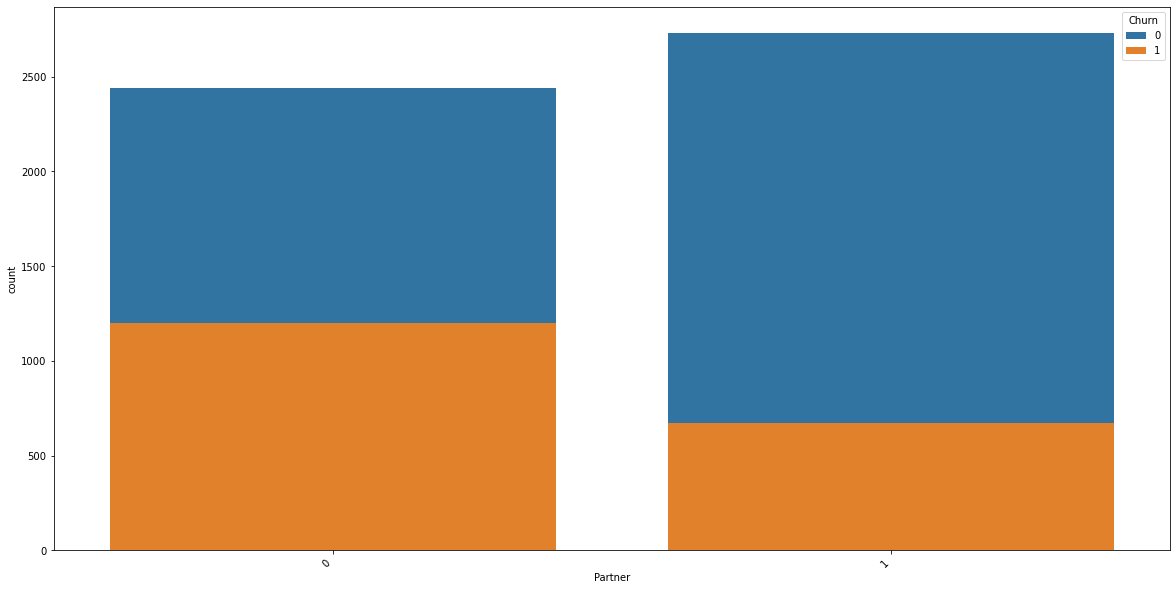

In [24]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Partner', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

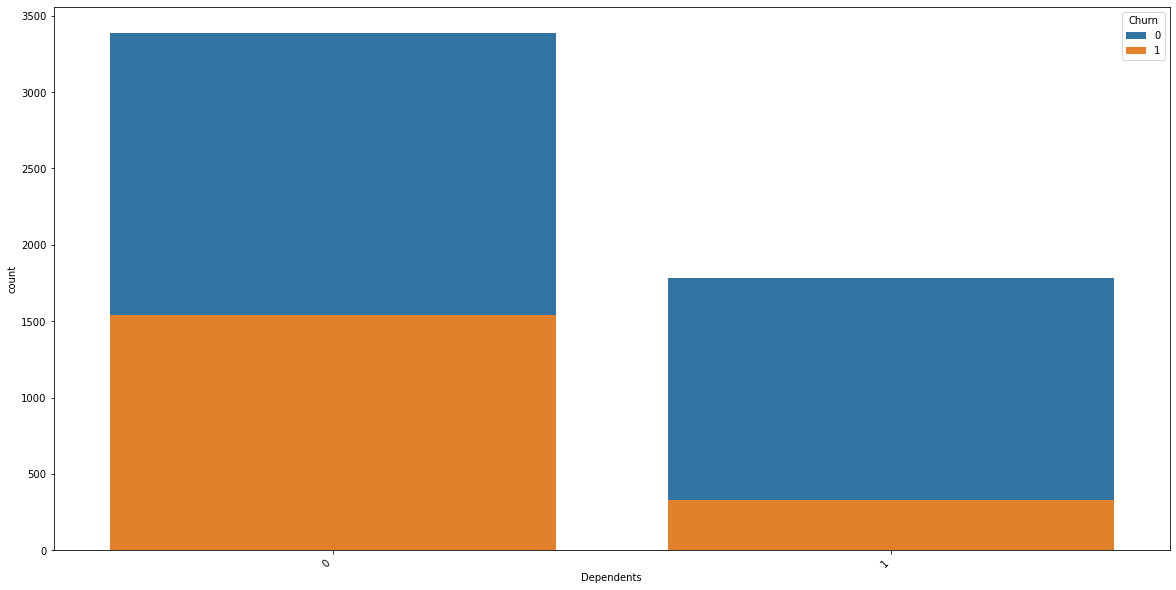

In [25]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Dependents', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

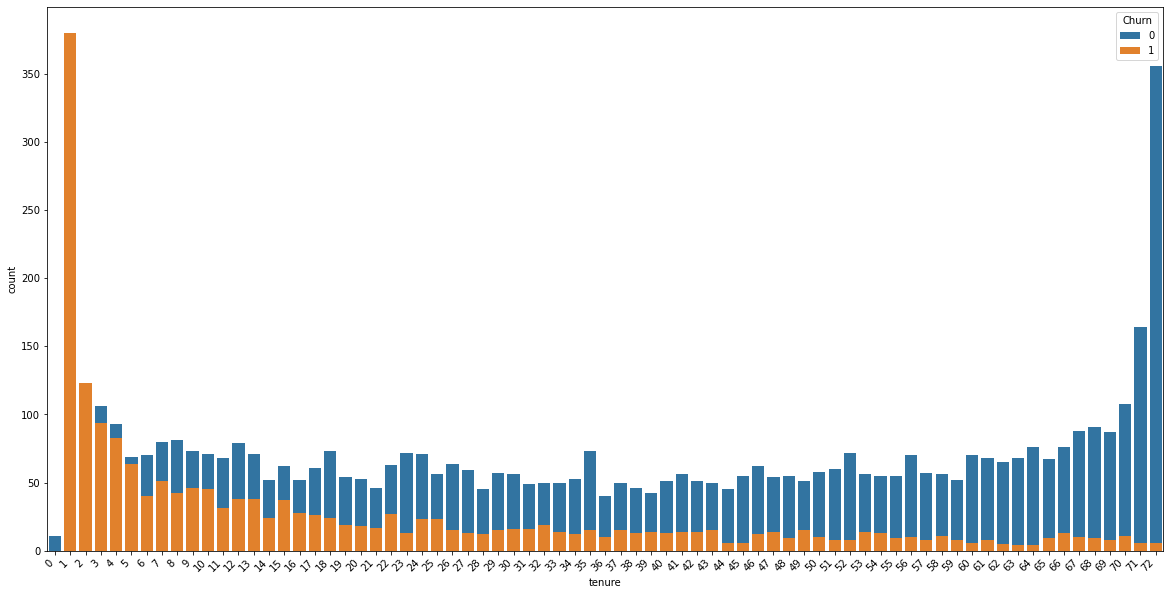

In [26]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'tenure', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

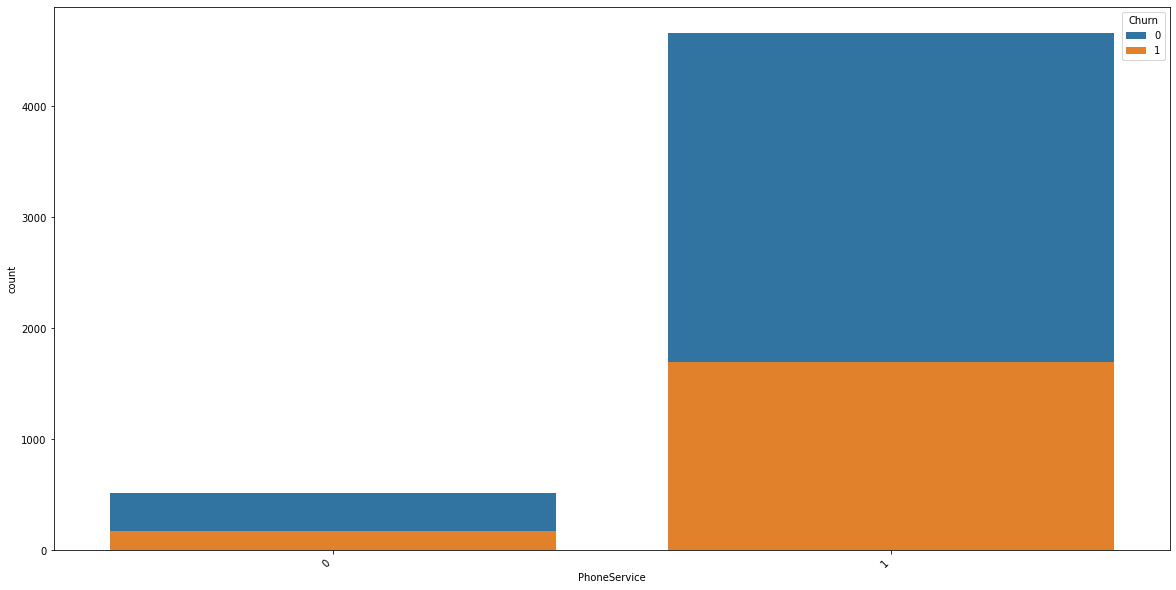

In [27]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'PhoneService', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

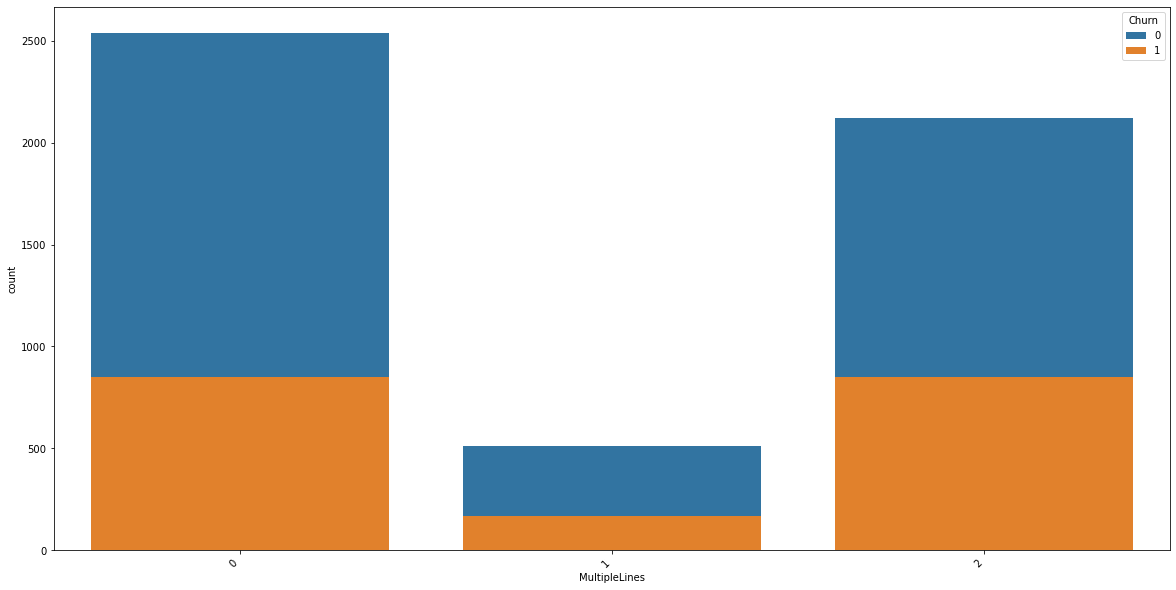

In [28]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

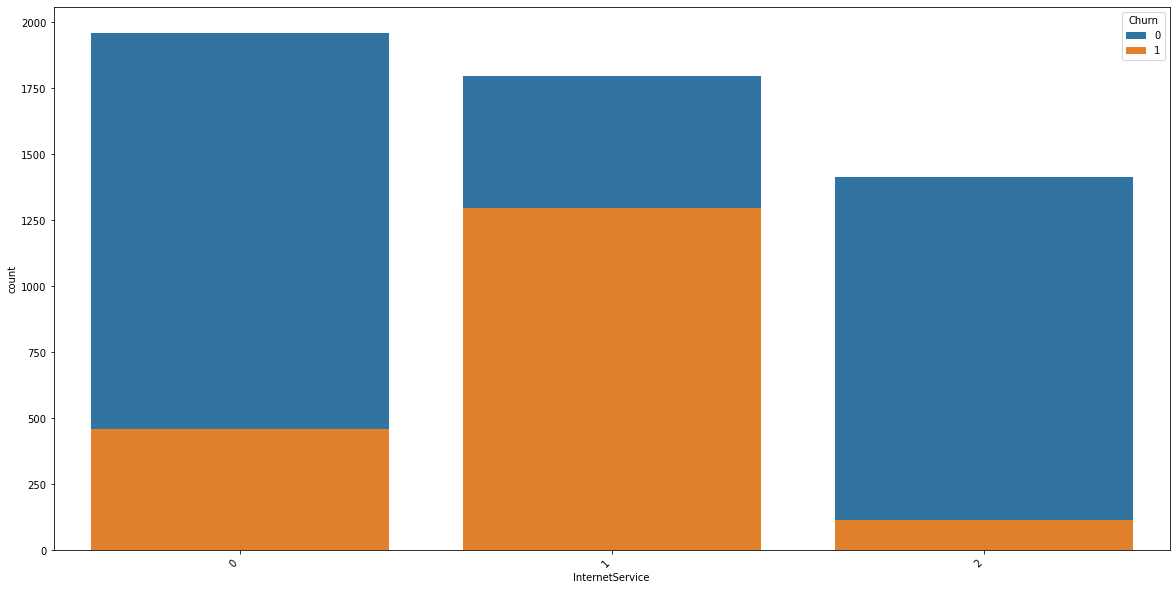

In [29]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'InternetService', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

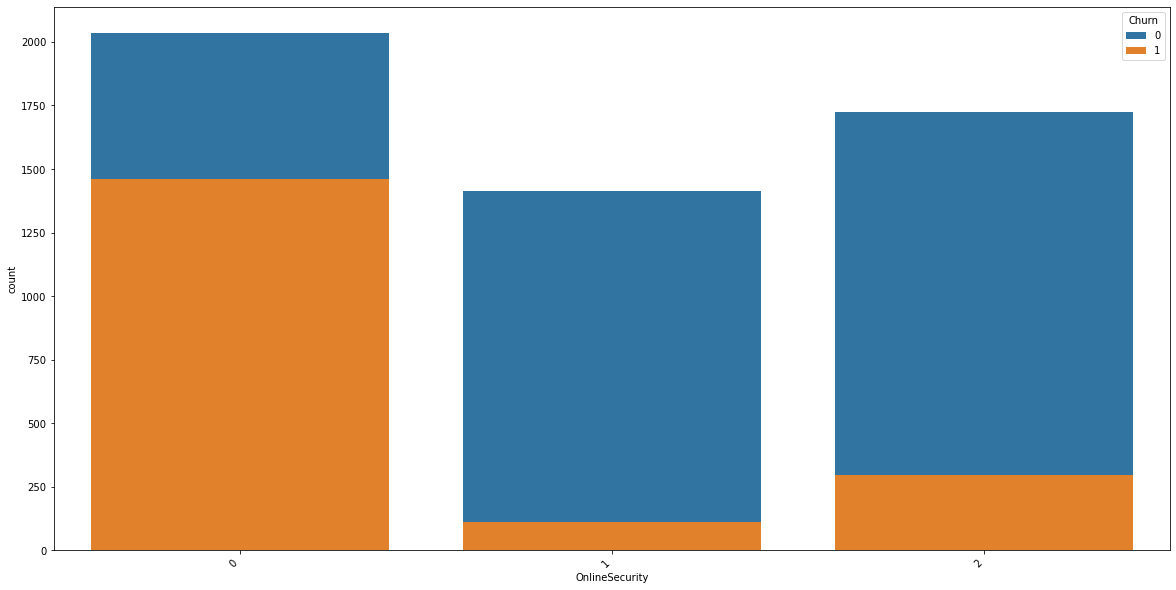

In [30]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

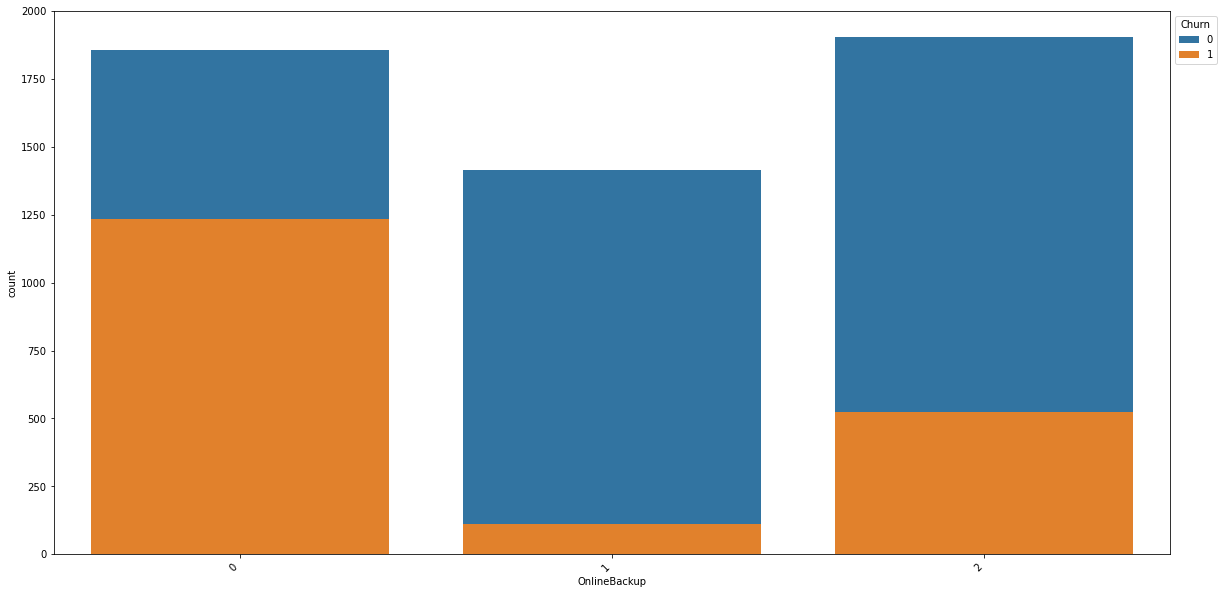

In [31]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

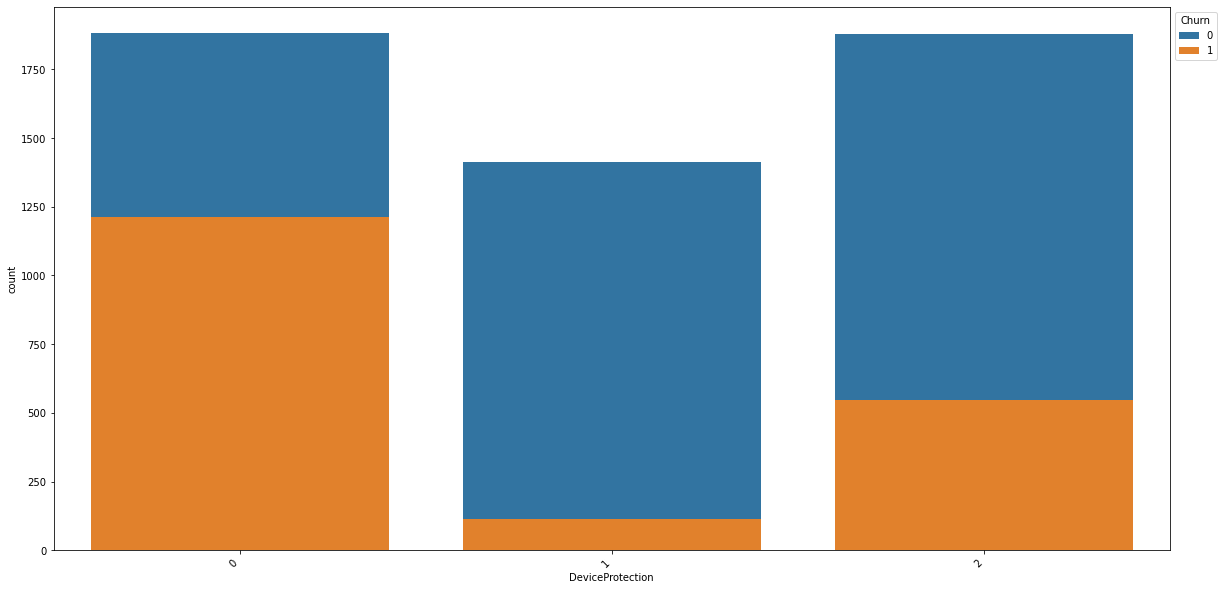

In [32]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

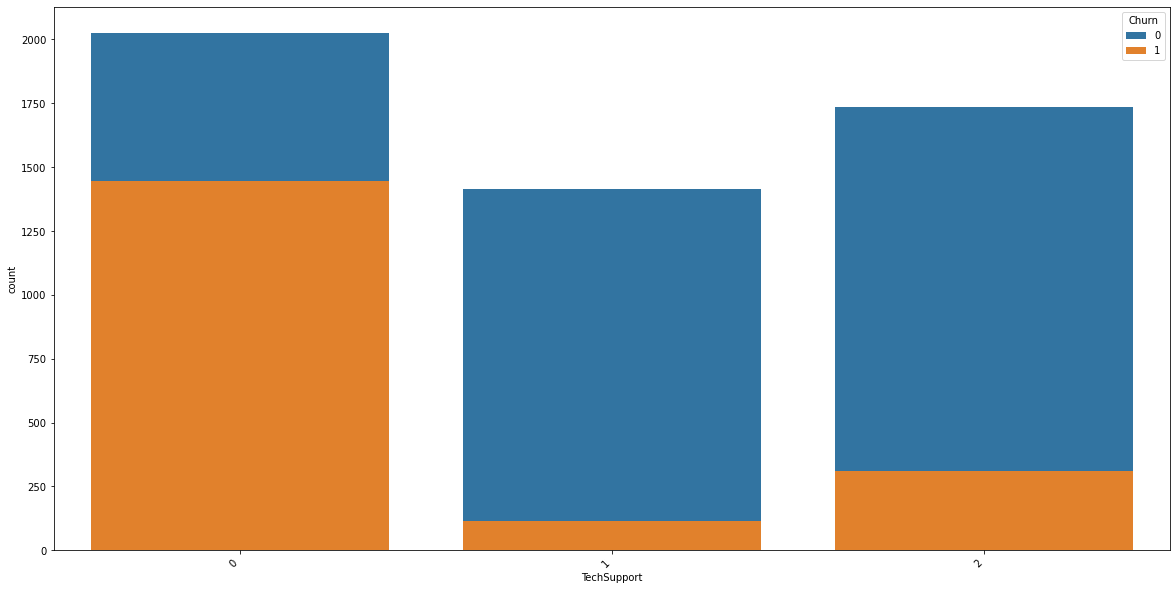

In [33]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'TechSupport', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

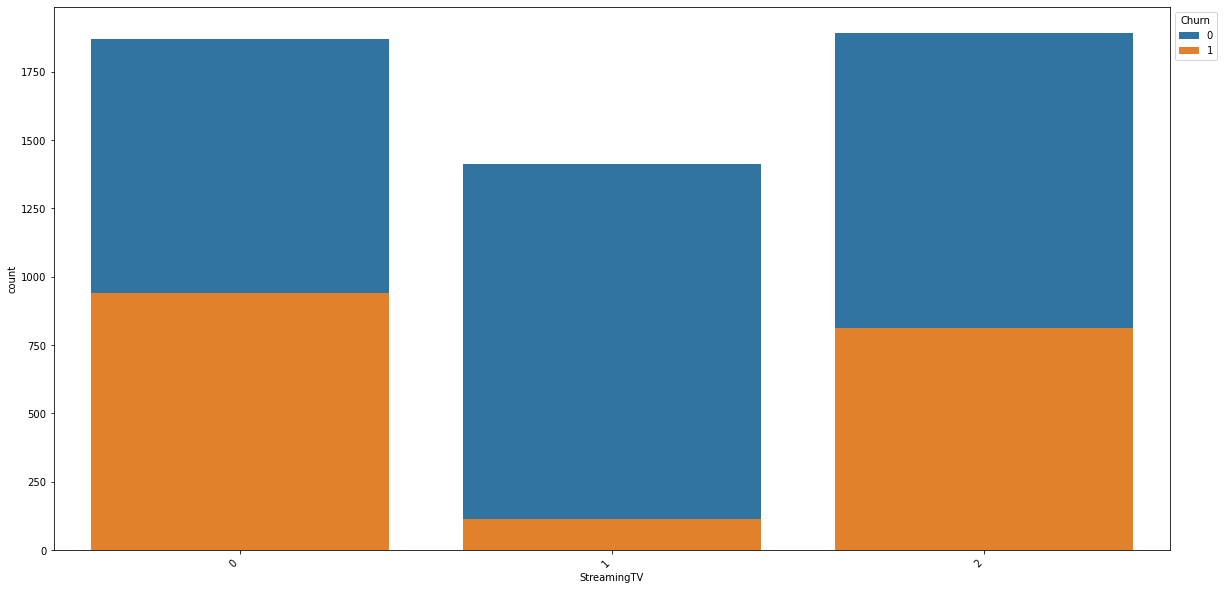

In [34]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

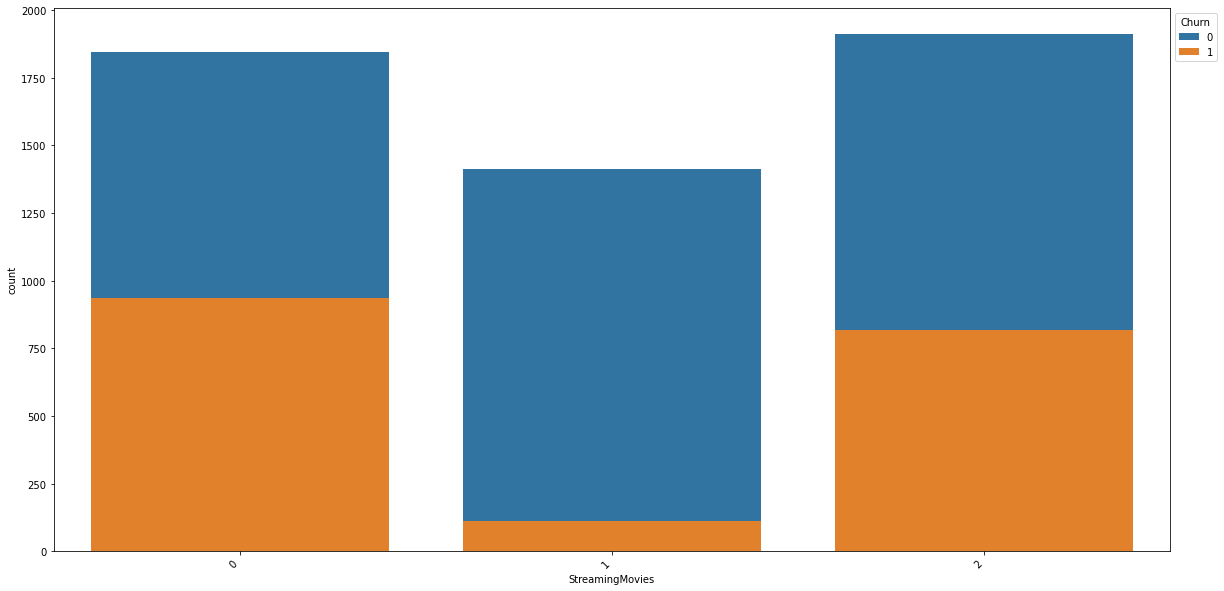

In [35]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'StreamingMovies', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

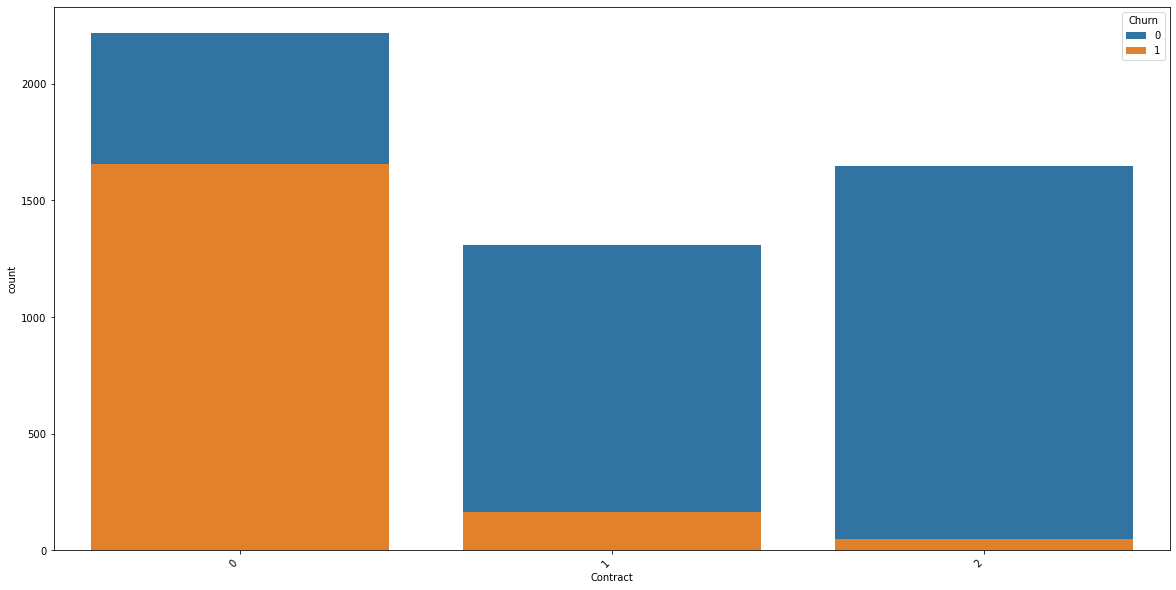

In [36]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'Contract', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

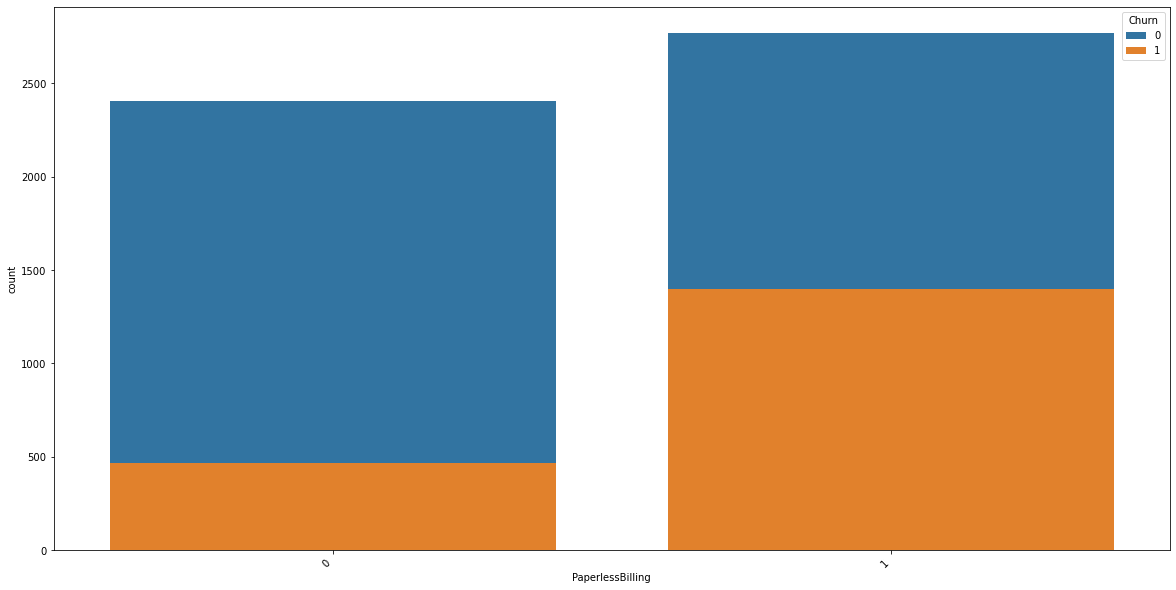

In [37]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

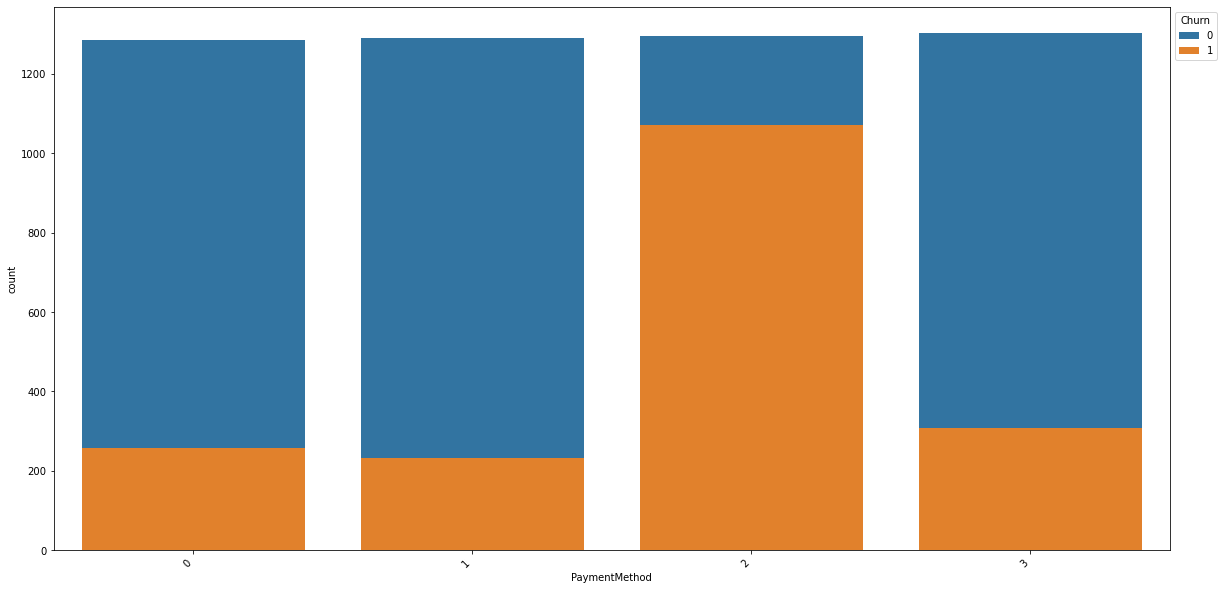

In [38]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

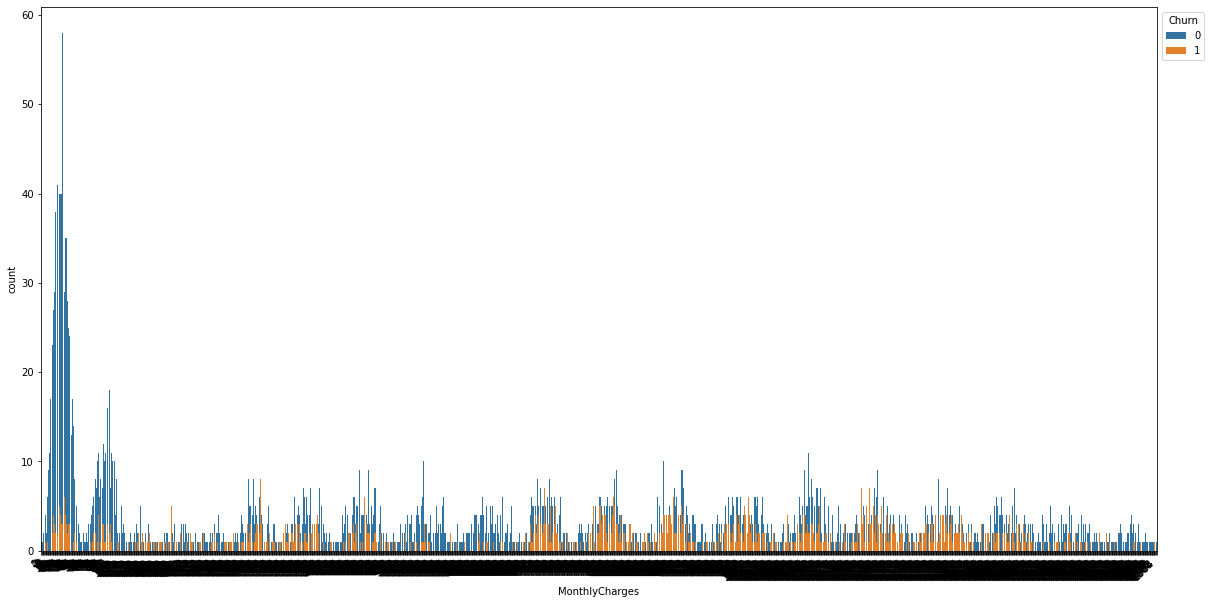

In [39]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'MonthlyCharges', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

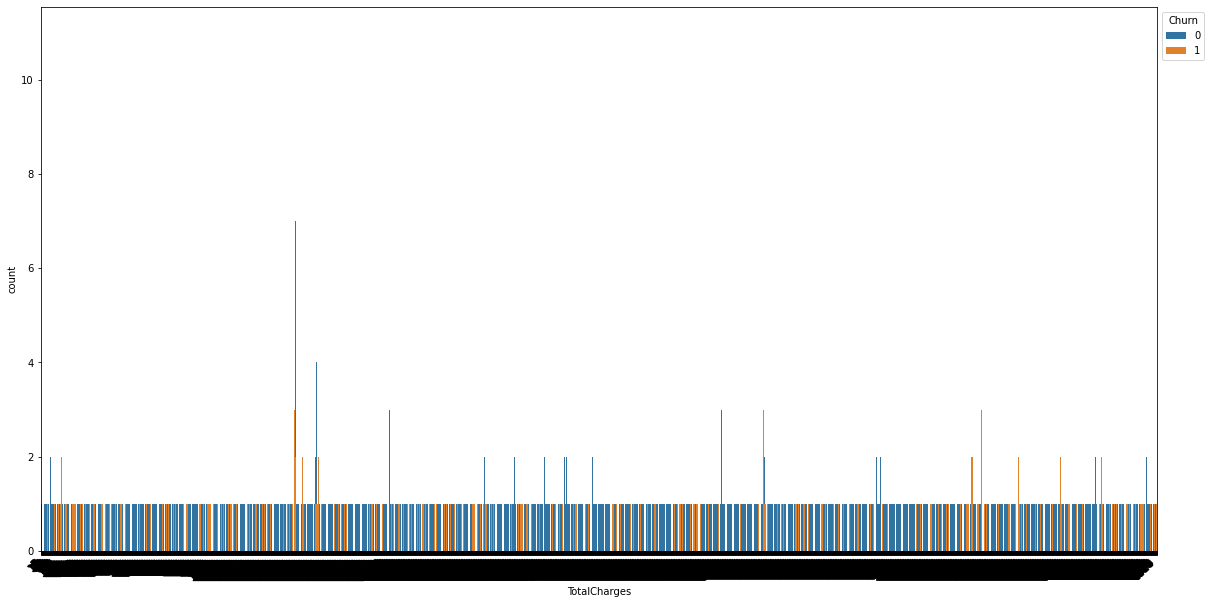

In [40]:

plt.figure(figsize =(20, 10))
sns.countplot(x = 'TotalCharges', hue = 'Churn', data = df, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Churn', bbox_to_anchor = (1, 1))

### <span style="color:green">Checking Pair Plots</span>

C:\Users\Visual singh\anaconda3\anaconda file\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


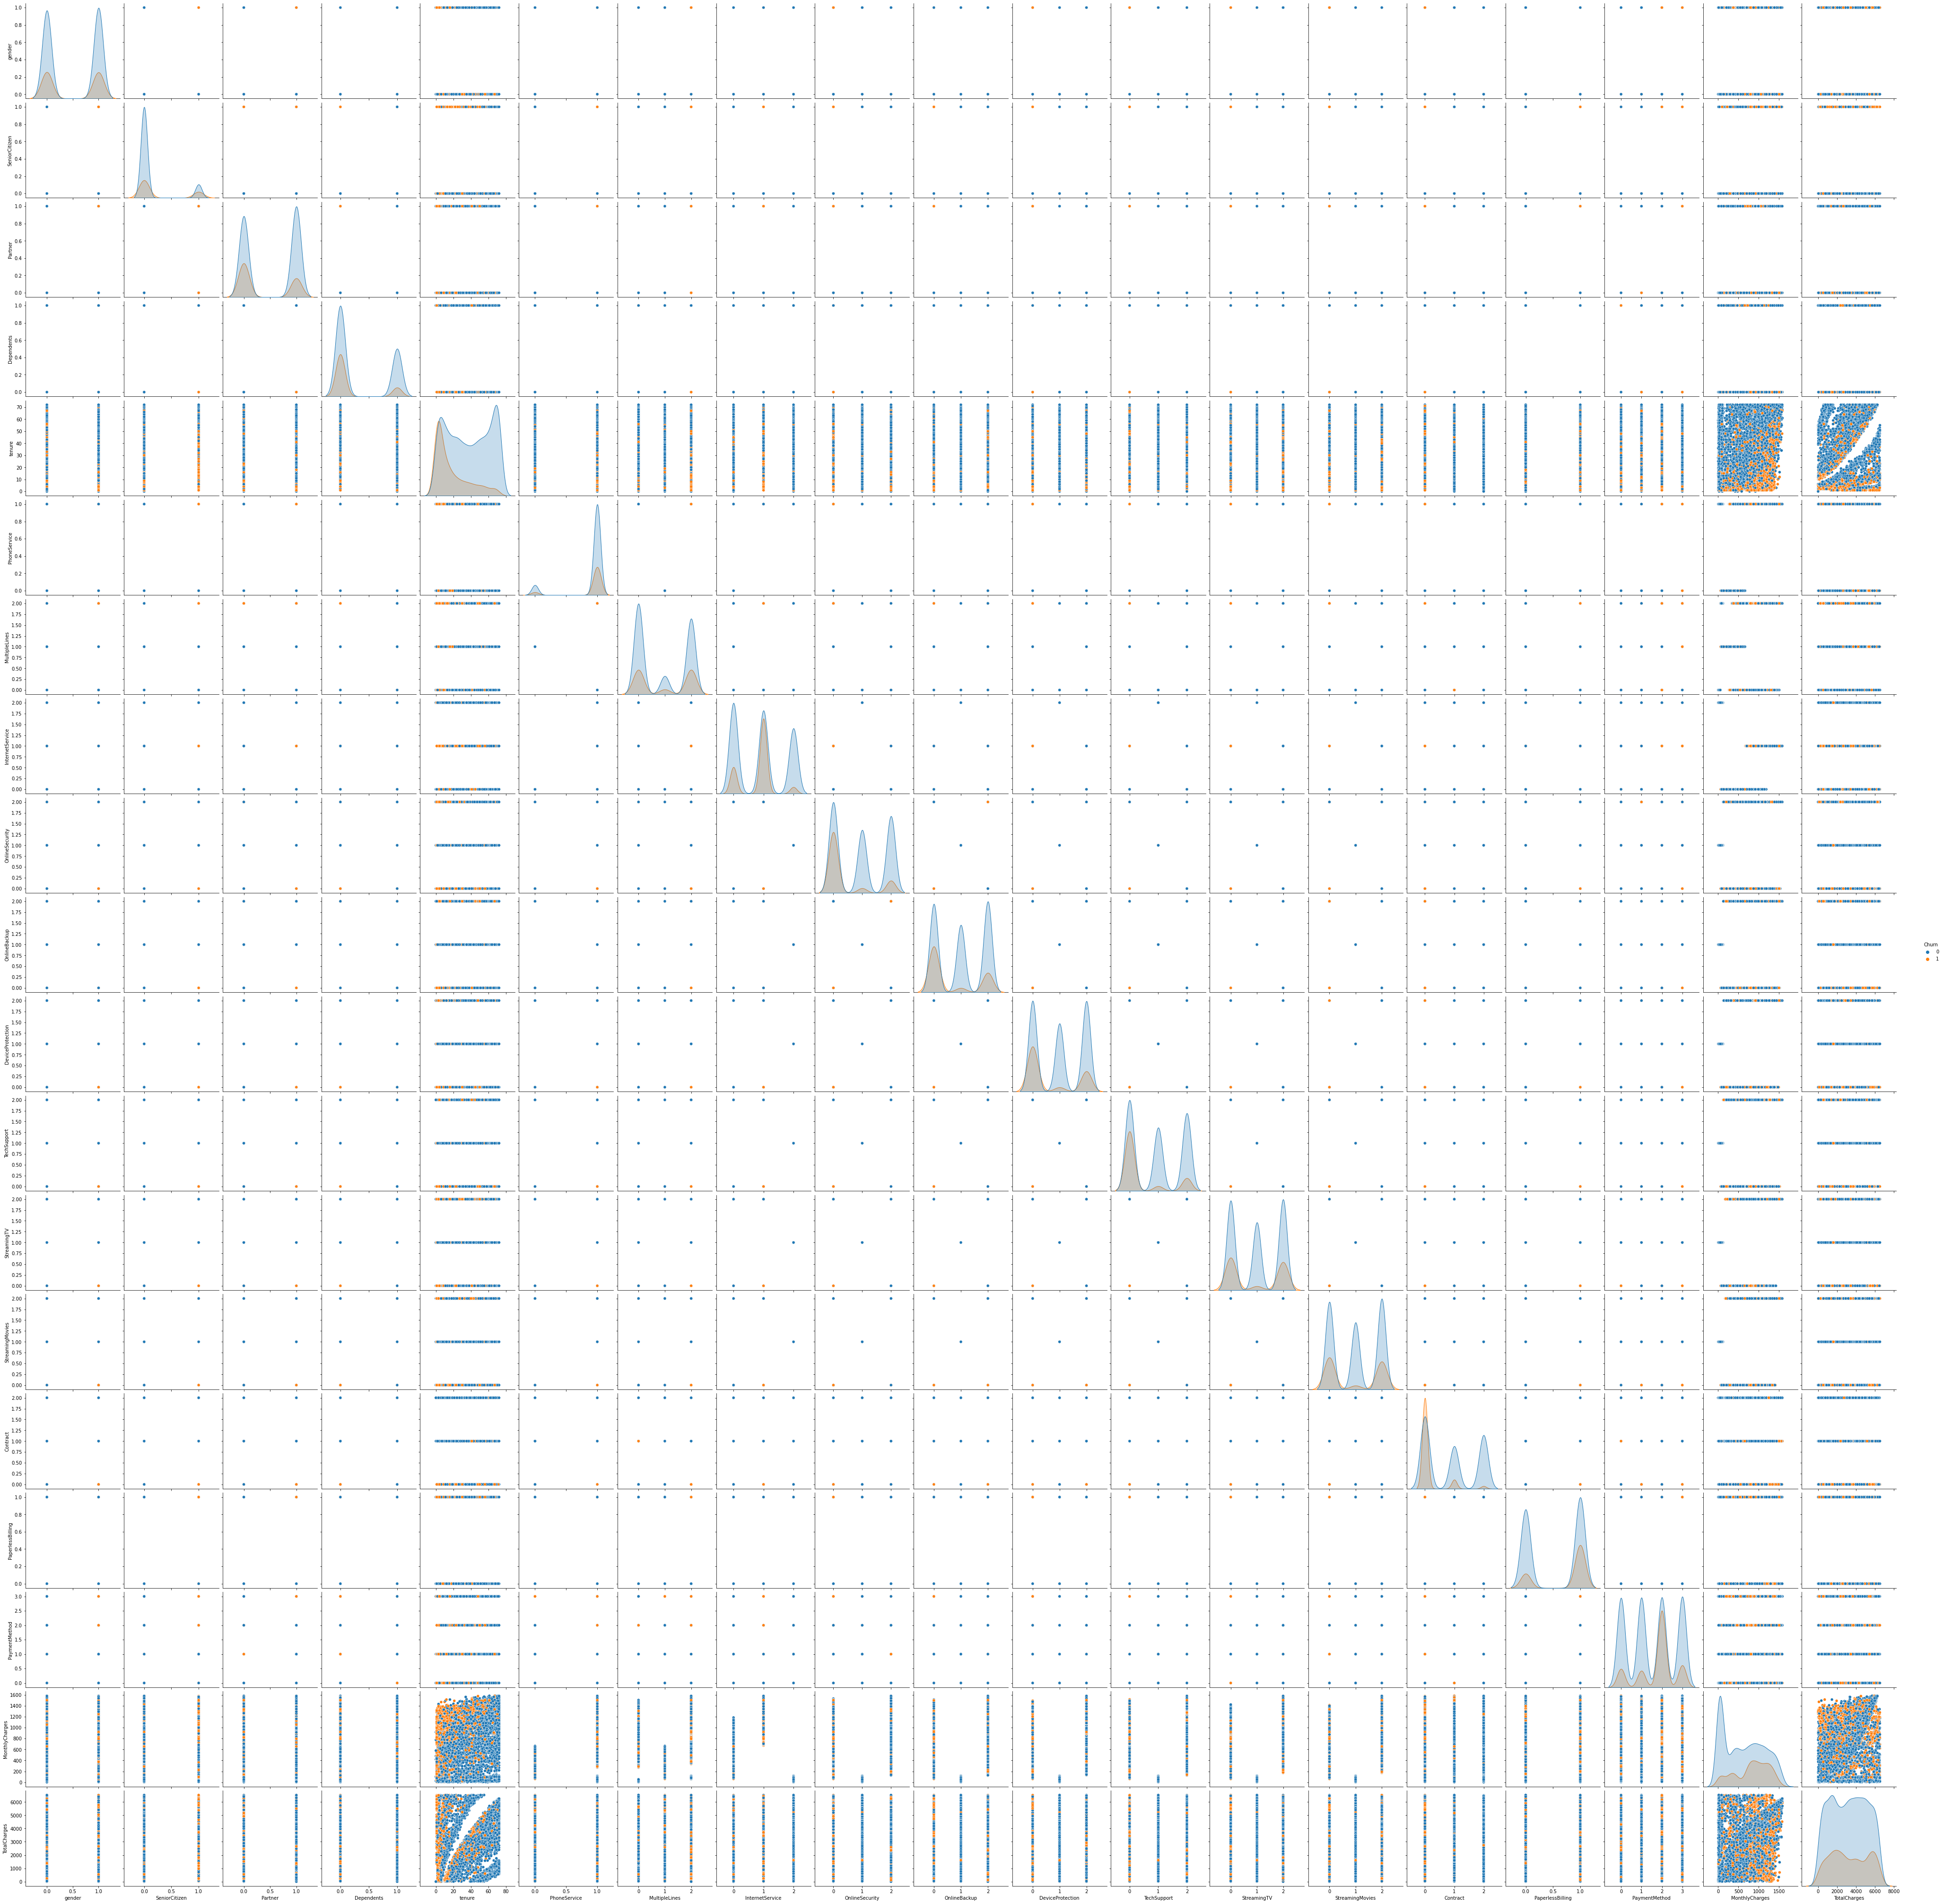

In [41]:
sns.pairplot(df, hue="Churn", size=3)

### <span style="color:green">Checking Correlation Matrix</span>

C:\Users\Visual singh\AppData\Local\Temp\ipykernel_17424\2728584882.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

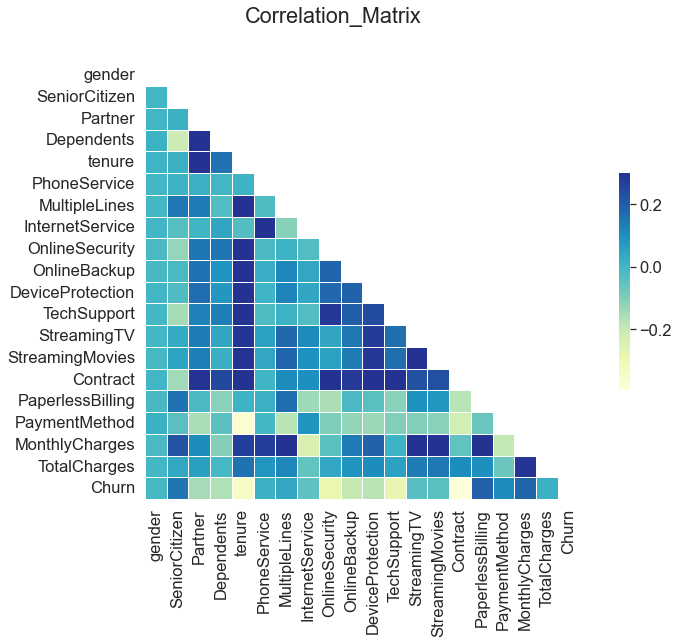

In [42]:
sns.set(style="white", font_scale =1.5)
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## <span style="color:red">Spliting the data for training & testing </span>

In [43]:
X=df.iloc[:,0:-1]
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660


In [44]:
y=df.iloc[:,-1]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 1)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [46]:
print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (5634, 19)
Y Train Shape  (5634,)
X Test Shape  (1409, 19)
Y Test Shape  (1409,)


#  <span style="color:red">Model Building</span>

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

In [48]:
#Logistic Regression
lr=LogisticRegression() 

#KNearest Neibour
knn=KNeighborsClassifier()

# Deciesion Tree
dt=DecisionTreeClassifier() 

# Random Forest
rf=RandomForestClassifier() 

# Adaboost Classifier 
adb=AdaBoostClassifier()   

# support vactor classifier
svm=SVC()   

#Gradient Boosting Classifier 
gdboost=GradientBoostingClassifier() 

#Xtrim Gredient Boosting Classifier 
xgboost=XGBClassifier()  

print("Model is created")

Model is created


In [49]:
# Applying Logistic Regression
lr.fit(X_train, y_train)

# Applying KNearest Neibour
knn.fit(X_train,y_train)

# Applying Deciesion Tree
dt.fit(X_train,y_train)

# Applying Random Forest
rf.fit(X_train,y_train)

# Applying Adaboost Classifier
adb.fit(X_train,y_train)

# Applying support vactor classifier
svm.fit(X_train,y_train)

# Applying Gradient Boosting Classifier
gdboost.fit(X_train,y_train)

# Applying Xtrim Gredient Boosting Classifier
xgboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


## <span style="color:green">Checking the accuracy of all 8 models</span>

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [51]:
# For Logistic Regression
print("Lr classification score",lr.score(X_train,y_train))

# For KNearest Neibour
print("knn classification score",knn.score(X_train,y_train))

# For Deciesion Tree
print("dt classification score",dt.score(X_train,y_train))

# For Random Forest
print("rf classification score",rf.score(X_train,y_train))

# For Adaboost Classifier
print("adb classification score",adb.score(X_train,y_train))

# For support vactor classifier
print("svm classification score",svm.score(X_train,y_train))

# For Gradient Boosting Classifier
print("gdboost classification score",gdboost.score(X_train,y_train))

# For Xtrim Gredient Boosting Classifier
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.7992545260915868
knn classification score 0.8196663116790912
dt classification score 0.9980475683351083
rf classification score 0.9980475683351083
adb classification score 0.8059992900248492
svm classification score 0.7300319488817891
gdboost classification score 0.8189563365282215
xgboost classification score 0.9432019879304224


## <span style="color:blue"> Model Evaluation</span>

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
import joblib
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
y_pred = lr.predict(X_train)
pred_lr = lr.predict(X_test)

mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)

print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_lr)*100}%")

MAE : 0.19446415897799857
RMSE : 0.44098090545736623
Training r2 Score : -2.558382235460588 %
Testing r2 Score: -2.9871848223908426%


In [65]:
y_pred = knn.predict(X_train)
pred_knn = knn.predict(X_test)

mse = mean_squared_error(y_test,pred_knn)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knn)
print("MAE :", mae)
print("RMSE :", rmse)

print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_knn)*100}%")

MAE : 0.19446415897799857
RMSE : 0.44098090545736623
Training r2 Score : 1.5981689388400167 %
Testing r2 Score: -2.9871848223908426%


In [68]:
y_pred = dt.predict(X_train)
pred_dt = dt.predict(X_test)

mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)

print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_dt)*100}%")

MAE : 0.0539389638041164
RMSE : 0.23224763465774284
Training r2 Score : 72.16917909381334 %
Testing r2 Score: 71.43421150911786%


In [69]:
y_pred = rf.predict(X_train)
pred_rf = rf.predict(X_test)

mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)

print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_rf)*100}%")

MAE : 0.0383250532292406
RMSE : 0.19576785545446576
Training r2 Score : 78.76544508781213 %
Testing r2 Score: 79.70325554595217%


In [70]:
y_pred = adb.predict(X_train)
pred_adb = adb.predict(X_test)

mse = mean_squared_error(y_test,pred_adb)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_adb)
print("MAE :", mae)
print("RMSE :", rmse)

print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_adb)*100}%")

MAE : 0.19730305180979418
RMSE : 0.4441880815710775
Training r2 Score : 2.140327787661833 %
Testing r2 Score: -4.490647374542545%


In [71]:
y_pred = svm.predict(X_train)
pred_svm = svm.predict(X_test)

mse = mean_squared_error(y_test,pred_svm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_svm)
print("MAE :", mae)
print("RMSE :", rmse)

print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_svm)*100}%")

MAE : 0.20298083747338538
RMSE : 0.45053394708210986
Training r2 Score : -0.6608262645842133 %
Testing r2 Score: -7.497572478845926%


In [72]:
y_pred = gdboost.predict(X_train)
pred_gdboost = gdboost.predict(X_test)

mse = mean_squared_error(y_test,pred_gdboost)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_gdboost)
print("MAE :", mae)
print("RMSE :", rmse)

print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_gdboost)*100}%")

MAE : 0.18097941802696949
RMSE : 0.42541675804670587
Training r2 Score : 7.471556467743046 %
Testing r2 Score: 4.15426230032968%


In [73]:
y_pred = xgboost.predict(X_train)
pred_xgboost = xgboost.predict(X_test)

mse = mean_squared_error(y_test,pred_xgboost)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_xgboost)
print("MAE :", mae)
print("RMSE :", rmse)

print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_xgboost)*100}%")

MAE : 0.0794889992902768
RMSE : 0.2819379351741741
Training r2 Score : 56.898371518665456 %
Testing r2 Score: 57.903048539752646%


## <span style="color:green">Using Confusion Matrix For Model Evaluation</span>

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [77]:
lr_yprad = lr.predict(X_test)
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("Confusion Matrix for lr_model",'\n',lr_conf_mat)

Confusion Matrix for lr_model 
 [[947 106]
 [168 188]]


In [78]:
knn_yprad = knn.predict(X_test)
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("Confusion Matrix for knn_model",'\n',knn_conf_mat)

Confusion Matrix for knn_model 
 [[957  96]
 [178 178]]


In [79]:
dt_yprad = dt.predict(X_test)
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("Confusion Matrix for dt_model",'\n',dt_conf_mat)

Confusion Matrix for dt_model 
 [[1005   48]
 [  28  328]]


In [80]:
rf_yprad = rf.predict(X_test)
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("Confusion Matrix for lr_model",'\n',rf_conf_mat)

Confusion Matrix for lr_model 
 [[1023   30]
 [  24  332]]


In [81]:
adb_yprad = adb.predict(X_test)
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("Confusion Matrix for lr_model",'\n',adb_conf_mat)

Confusion Matrix for lr_model 
 [[936 117]
 [161 195]]


In [82]:
svm_yprad = svm.predict(X_test)
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("Confusion Matrix for svm_model",'\n',svm_conf_mat)

Confusion Matrix for svm_model 
 [[941 112]
 [174 182]]


In [83]:
gdboost_yprad = gdboost.predict(X_test)
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("Confusion Matrix for gdboost_model",'\n',gdboost_conf_mat)

Confusion Matrix for gdboost_model 
 [[963  90]
 [165 191]]


In [84]:
xgboost_yprad = xgboost.predict(X_test)
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("Confusion Matrix for xgboost_model",'\n',xgboost_conf_mat)

Confusion Matrix for xgboost_model 
 [[998  55]
 [ 57 299]]


## <span style="color:green">Checking Classification Report Of All Model</span>

In [85]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1053
           1       0.64      0.53      0.58       356

    accuracy                           0.81      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

 knn classification_report 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1053
           1       0.65      0.50      0.57       356

    accuracy                           0.81      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.81      0.80      1409

 dt classification_report 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1053
           1       0.87      0.92      0.90       356

    accuracy                           0.95      1409
   macro avg       0.92      0.94      0.93

## <span style="color:blue">-> Using AUC - ROC Curve</span>

In [86]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [87]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.7137125601545077
0.7044159544159544
0.9378821345113479
0.9520471205864464
0.7183208489388264
0.7024365910133701
0.7255233842312494
0.8938279607755264


### <span style="color:green">-> Using ROC curve to check best fittted model</span>

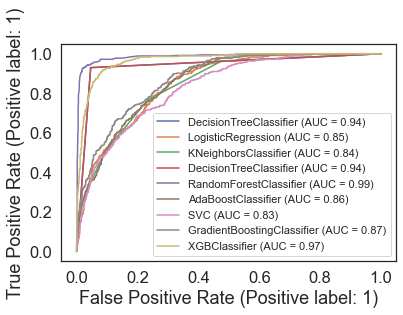

In [88]:
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

# <span style="color:red">MODEL SAVING:---------</span>

In [89]:
import pickle
Census_model = 'Customer_Churn_model.pickle'
pickle.dump(dt,open(Census_model,'wb'))

In [90]:
Churn = pickle.load(open('Customer_Churn_model.pickle','rb'))
result = Churn.score(X_test, y_test)
print(result)

0.9460610361958836


In [92]:
Prediction=np.array(dt.predict(X_test))

In [94]:
Conclusion  =pd.DataFrame([Churn.predict(X_test)[:],Prediction[:]],index=['Predicted','Original'])

In [95]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408
Predicted,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
Original,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
